## Практическая работа 1-2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.__version__

'1.4.4'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [3]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [4]:
rows, columns = df.shape
print(f"Количество строк: {rows}")
print(f"Количество колонок: {columns}")

Количество строк: 32561
Количество колонок: 15


3) Какие типы данных у элементов этого датасета?

In [5]:
data_types = df.dtypes
print("Типы данных:")
print(data_types)

Типы данных:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [7]:
missing_values = df.isnull().sum()
print("Пропуски по признакам:")
print(missing_values[missing_values > 0])
df.info()

Пропуски по признакам:
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Пропусков нет

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [8]:
unique_workclasses = df['workclass'].unique()
print("Уникальные рабочие классы:")
print(unique_workclasses)

Уникальные рабочие классы:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


7) Какой средний возраст женщин и мужчин?

In [9]:
average_age_by_sex = df.groupby('sex')['age'].mean()
print("Средний возраст:")
print(average_age_by_sex)

Средний возраст:
sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

Гистограмма образования:


<AxesSubplot:>

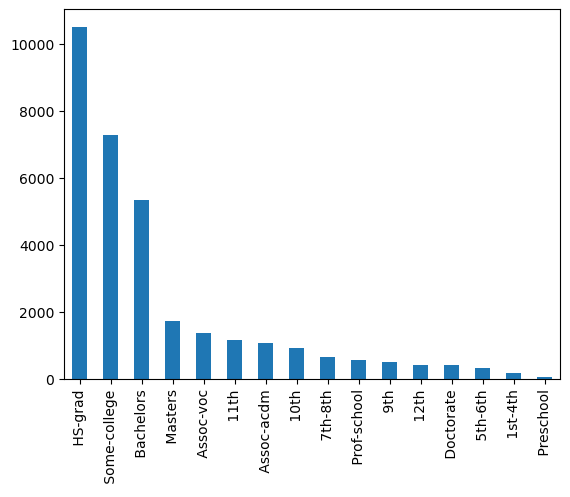

In [20]:
education_histogram = df['education'].value_counts()
print("Гистограмма образования:")
education_histogram.plot.bar()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [11]:
average_age_by_salary = df.groupby('income')['age'].agg(['mean', 'std'])
print("Средний возраст по уровню дохода:")
print(average_age_by_salary)

Средний возраст по уровню дохода:
             mean        std
income                      
 <=50K  36.783738  14.020088
 >50K   44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [41]:
high_income = df[df['income'].str.strip() == '>50K']
high_income_high_education = high_income[high_income['education'].str.strip().isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])]
print("Люди с доходом >50K и высшим образованием:")
display(high_income_high_education)
print('-'*150)
low_income_low_education_indices = high_income.index.difference(high_income_high_education.index)
low_income_low_education = high_income.loc[low_income_low_education_indices]
print("Люди с доходом >50K и невысшим образованием:")
display(low_income_low_education)

Люди с доходом >50K и высшим образованием:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32536,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K


------------------------------------------------------------------------------------------------------------------------------------------------------
Люди с доходом >50K и невысшим образованием:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


Ответ: нет не правда

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [70]:
married_status = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
df['is_married'] = df['marital.status'].str.strip().isin(married_status)
income_percentage_by_marital_status = df[df['sex'].str.strip() == 'Male'].groupby(['is_married', 'income'])['income'].size().unstack()

print("Доля зарабатывающих много среди женатых и холостых мужчин:")
print(income_percentage_by_marital_status)


Доля зарабатывающих много среди женатых и холостых мужчин:
income       <=50K   >50K
is_married               
False         7552    697
True          7576   5965


Доля больше среди женатых

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [73]:
average_hours_per_week_by_country = df.groupby(['native.country', 'income'])['hours.per.week'].mean()
print("Среднее время работы зарабатывающих мало и много для каждой страны:")
average_hours_per_week_by_country

Среднее время работы зарабатывающих мало и много для каждой страны:


native.country  income
 ?               <=50K    40.164760
                 >50K     45.547945
 Cambodia        <=50K    41.416667
                 >50K     40.000000
 Canada          <=50K    37.914634
                            ...    
 United-States   >50K     45.505369
 Vietnam         <=50K    37.193548
                 >50K     39.200000
 Yugoslavia      <=50K    41.600000
                 >50K     49.500000
Name: hours.per.week, Length: 82, dtype: float64

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [77]:
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
df['capital_diff_category'] = pd.cut(np.log1p(df['capital_diff']), bins=10, labels=False)
education_capital_diff_pivot = df.pivot_table(index='education', columns='capital_diff_category', values='income', aggfunc='count', fill_value=0)

print("Сводная таблица для сравнения уровня образования и разницы между capital.gain и capital.loss:")
education_capital_diff_pivot

Сводная таблица для сравнения уровня образования и разницы между capital.gain и capital.loss:


D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


capital_diff_category,0.0,4.0,5.0,6.0,7.0,8.0,9.0
education,,,,,,,
10th,865,1,1,19,14,2,3
11th,1089,0,5,15,29,4,0
12th,403,0,3,6,10,3,0
1st-4th,159,0,0,1,4,0,0
5th-6th,308,0,0,5,9,0,0
7th-8th,582,0,0,25,15,1,0
9th,474,2,2,17,9,0,1
Assoc-acdm,930,0,0,20,43,18,1
Assoc-voc,1194,0,2,28,82,21,1


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [81]:
high_income_female = df[(df['sex'].str.strip() == 'Female') & (df['income'].str.strip() == '>50K')]
average_salary_by_country_female = high_income_female.groupby('native.country')['income'].count()

print("Женщины из каких стран получают в среднем большую зарплату (>50K):")
average_salary_by_country_female

Женщины из каких стран получают в среднем большую зарплату (>50K):


native.country
 ?                       17
 Canada                   9
 China                    5
 Cuba                     3
 Dominican-Republic       2
 El-Salvador              1
 England                  6
 France                   3
 Germany                  7
 Greece                   1
 Haiti                    1
 Honduras                 1
 Hong                     1
 Hungary                  1
 India                    2
 Iran                     2
 Ireland                  1
 Italy                    5
 Jamaica                  1
 Japan                    5
 Laos                     1
 Mexico                   2
 Nicaragua                1
 Philippines             12
 Poland                   2
 Portugal                 2
 Puerto-Rico              2
 Scotland                 1
 South                    3
 Taiwan                   4
 Thailand                 1
 United-States         1072
 Vietnam                  1
 Yugoslavia               1
Name: income, dtype: int64

Ответ: Canada (первая страна ? - неизвестна)

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [83]:
df['magic_salary'] = np.where(df['income'].str.strip() == '<=50K', np.random.randint(0, 51, size=len(df)), np.random.randint(51, 201, size=len(df)))
average_hourly_salary_by_education = df.groupby('education')['magic_salary'].mean()

print("Средняя зарплата в час для уровня образования:")
average_hourly_salary_by_education

Средняя зарплата в час для уровня образования:


education
 10th             32.222937
 11th             30.205957
 12th             32.863741
 1st-4th          31.000000
 5th-6th          28.714715
 7th-8th          30.851393
 9th              29.562257
 Assoc-acdm       49.071228
 Assoc-voc        52.031114
 Bachelors        66.392157
 Doctorate       102.951574
 HS-grad          41.140368
 Masters          80.858387
 Preschool        28.588235
 Prof-school      98.951389
 Some-college     43.617062
Name: magic_salary, dtype: float64